In [1]:
# 이미지 데이터 classification

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier #
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #train 데이터를 validation과 model로 쪼개는 작업을 할 때 쓰는 메소드 

In [6]:
# data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.sample() #284개의 피쳐 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37094,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.imshow() #imshow 함수 
# 안에 train.iloc[37094, 1:] 37094번 데이터, 라벨 제외 하고 시작 .values 값 가져오고 reshape(28,28)로 28개씩 끊어서 가져오기
# np.array를 했다고 생각하면 됨 (28,28)

Text(0.5, 1.0, 'label:6')

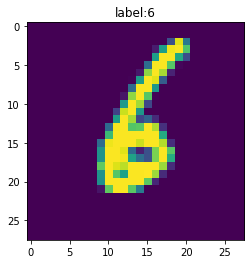

In [13]:
plt.imshow(train.iloc[37094,1:].values.reshape(28,28))
plt.title('label:{}'.format(train.iloc[37094,0])) 

8

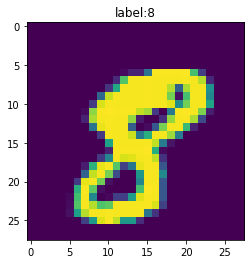

In [17]:
plt.imshow(train.iloc[10,1:].values.reshape(28,28))
plt.title('label:{}'.format(train.iloc[10,0]))
train.iloc[10,0]

2

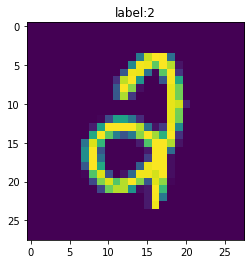

In [18]:
plt.imshow(train.iloc[10000,1:].values.reshape(28,28))
plt.title('label:{}'.format(train.iloc[10000,0]))
train.iloc[10000,0] 
# 이상한 데이터 -> 나중에 트레인 시켜서 바꾸자 

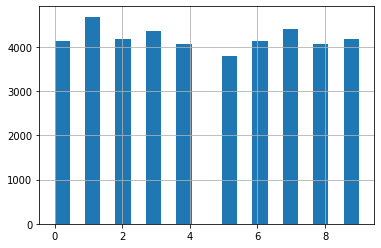

In [19]:
# 라벨 분포 확인하기 (classification을 잘 하려면)
# train epdlxjdml fkqpf quf qnsvh qhrl 
train['label'].hist(bins=20) #bins -> 칸 20칸을 만들어줘서 좀 떨어져서 보이게 함 

In [20]:
# split train, validation set
# two classification을 바꿔서 8이냐 아니냐로 바꿔보자! (8이면 true, 아니면 false)

In [56]:
x = train.drop('label',axis=1)
y = train['label'] == 8

In [57]:
#train_size 또는 train_size를 지정하지 않았을 때 어떤 비율로 분할되는가?
x_train, x_vail, y_train, y_vail = train_test_split(x,y)
# train_size를 지정하지 않으면 기본으로 0.25로 됨 
# 중요한사실! 보통 0.25로 해주긴 하는데, 데이터가 충분히 많을 때는 작은 트랙션을 만들어도 괜찮음. 0.1이나 0.5 -> 5% 정도로 해줌. 
# Train set에서 데이터를 최대한 많이 활용하기 위해서 퍼센트를 줄이기도 함. 

In [31]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train.head()

19311    False
734      False
28039    False
33066    False
20141    False
Name: label, dtype: bool

In [24]:
# model

In [27]:
forest = RandomForestClassifier(random_state=42, n_estimators=20)

In [33]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
prediction = forest.predict(x_vail)

In [36]:
prediction_proba = forest.predict_proba(x_vail)[:,1] # [:,1] 

In [37]:
y_vail = pd.DataFrame(y_vail)
y_vail.columns = ['Actual']

In [38]:
y_vail['Predict'] = prediction
y_vail['Predict_proba'] = prediction_proba

In [39]:
y_vail.head()

,Actual,Predict,Predict_proba
33515,False,False,0.0
24068,False,False,0.0
19937,False,False,0.0
36770,False,False,0.0
24224,True,False,0.5


In [40]:
y_vail.groupby(['Actual', 'Predict']).size()

Actual  Predict
False   False      9519
        True         15
True    False       206
        True        760
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_vail['Actual'], y_vail['Predict'])
tn, fp, fn, tp = confusion.ravel()
print(tn, fp, fn, tp)
confusion
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(accuracy)

9519 15 206 760
0.9789523809523809


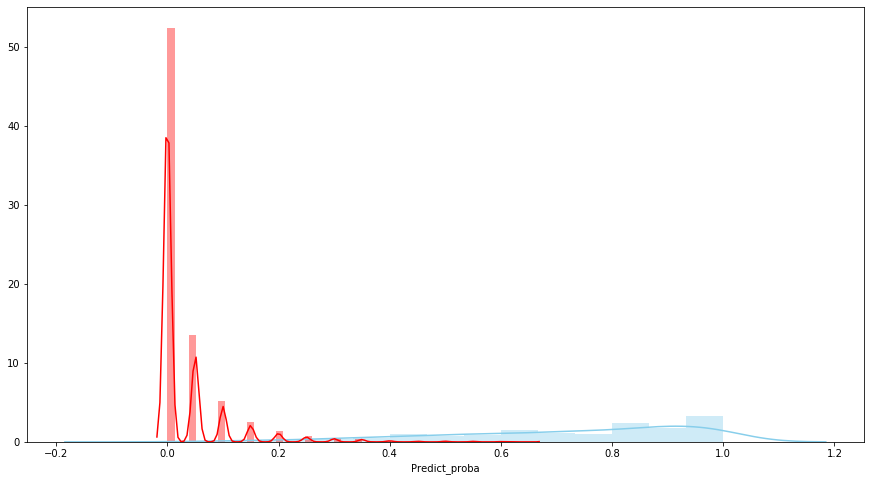

In [43]:
plt.figure(figsize=(15, 8))
sns.distplot(y_vail[y_vail['Actual']==1]['Predict_proba'], color="skyblue", label="Survived")
sns.distplot(y_vail[y_vail['Actual']==0]['Predict_proba'], color="Red", label="Dead")

In [46]:
print(tn, fp, fn, tp)
confusion
accuracy = (tp+tn) / (tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(accuracy)
print(precision)
print(recall)

9519 15 206 760
0.9789523809523809
0.9806451612903225
0.7867494824016563


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_vail['Actual'], y_vail['Predict']))
# suport - false : 8 아닌 데이터 , true - 8인 데이터
# macro avg = 단순 평균 
# weighted avg = 가중 평균  (9534/10600 * 0.98, ... 좀 더 합리적임 둘의 라벨 분포가 다르니까)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      9534
        True       0.98      0.79      0.87       966

    accuracy                           0.98     10500
   macro avg       0.98      0.89      0.93     10500
weighted avg       0.98      0.98      0.98     10500



# cross-validation
- 객관적으로 모델 평가하기 

In [51]:
from sklearn.model_selection import cross_val_score

In [58]:
cv_score = cross_val_score(forest, x, y, cv=5, scoring='accuracy') # 위에서 이미 y==8 값만 뺐으니까 여기서도 x,y만 넣어주기 
cv_score

array([0.97619331, 0.97726461, 0.97678571, 0.9763067 , 0.9772592 ])

# 모델을 직접 만들어 cross-validation에 적용해보기 

In [59]:
from sklearn.base import BaseEstimator
# 직접 모델 만들기! class

In [73]:
class Never8(BaseEstimator): # 절대 8일수 없다 -> 다 8이 아닐거라고 예측하자 
    def fit(self, x, y): # fit 함수 만들기 
        pass
    def predict(self, x): #validation set을 받아서 predict하기 
        # 들어온 x의 길이만큼 0을 반환한다
        return np.zeros((len(x), 1), dtype=bool) #내가 받은 x의 길이만큼 0을 돌려주기(다 0이라고 예측)

In [74]:
model = Never8()

In [75]:
model.predict(x_vail)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [76]:
# 라벨의 불균형
cross_val_score(model, x, y, cv=5, scoring='accuracy')
# 모든 데이터를 0으로 예측했는데도 acc 값이 왜이렇게 높을까? 
# 어차피 전체 데이터의 8은 10% 밖에 없기 때문에 바보같은 모델이어도 acc는 잘 나옴 

array([0.90535714, 0.9025    , 0.9047619 , 0.89916667, 0.90452381])

In [79]:
print('precision:{}'.format(cross_val_score(model, x, y, cv=5, scoring='precision')))
print('precision:{}'.format(cross_val_score(model, x, y, cv=5, scoring='recall')))
# tp가 하나도 없기 때문에 0으로 나옴 (true라고 예측한 값이 하나도 없기 때문에! )

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


precision:[0. 0. 0. 0. 0.]
precision:[0. 0. 0. 0. 0.]


# Roc curve
- with hold-out validation

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [85]:
forest.predict_proba(x_vail) 
# two_class_classifier에 대한 leaf node(terminal node)에서 아노는 라벨의 확률 값이 2개니까 2쌍씩 나옴 - 그림 참고 

array([[1.  , 0.  ],
       [0.85, 0.15],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [84]:
y_proba = forest.predict_proba(x_vail)[:,1]

In [87]:
fpr, tpr, threshold = roc_curve(y_vail, y_proba)

<function matplotlib.pyplot.show(*args, **kw)>

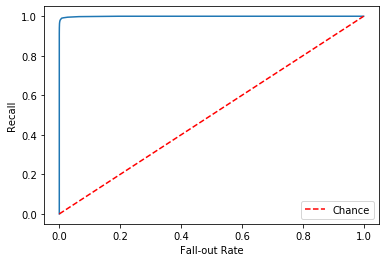

In [92]:
# 시각화
# x축을 fpr(Fall-out Rate'), y축을 tpr(Recall)로 하는 그래프 그리기
plt.plot(fpr, tpr)
# 45도 각도 점선 그리기
plt.plot([0,1],[0,1], 'r--', label='Chance')
# x라벨과 y라벨에 이름 붙이기
plt.xlabel('Fall-out Rate')
plt.ylabel('Recall')
# 각 그래프의 legend 출력하기, 위치 정해주기 (best 위치에 출력)
plt.legend(loc='best')
plt.show

In [93]:
auc_score = roc_auc_score(y_vail,y_proba)

<function matplotlib.pyplot.show(*args, **kw)>

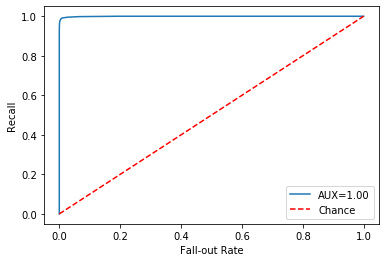

In [94]:
# 시각화
# x축을 fpr(Fall-out Rate'), y축을 tpr(Recall)로 하는 그래프 그리기
plt.plot(fpr, tpr, label='AUX=%0.2f'%(auc_score)) # roc 커브 밑 구해주는 함수 
# 45도 각도 점선 그리기
plt.plot([0,1],[0,1], 'r--', label='Chance') #chane: 랜덤으로 예측했을 때 45도 각도로 된다는 뜻 (고 직선)
# x라벨과 y라벨에 이름 붙이기
plt.xlabel('Fall-out Rate')
plt.ylabel('Recall')
# 각 그래프의 legend 출력하기, 위치 정해주기 (best 위치에 출력)
plt.legend(loc='best')
plt.show

In [95]:
# threshold 이동 하는 방법 
print(sorted(np.unique(y_proba)))
print(sorted(threshold))

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 2.0]


# mult_calss_classifier

In [97]:
# 결국 하고 싶은던 0부터 9까지 라벨을 매겨주는 일 
# 다행히 이 데이터는 클래스가 확장된다고해서 개념이 변하지 않음. 우린 랜덤포레스트를 배웠으니까! 전체 플로우는 똑같음 

In [156]:
x = train.drop('label',axis=1)
y = train['label']

In [162]:
x_train, x_vali, y_train, y_vali = train_test_split(x,y)

In [163]:
forest = RandomForestClassifier(random_state=42, n_estimators=20)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [164]:
prediction = forest.predict(x_vali)

In [165]:
prediction_proba = forest.predict_proba(x_vali)[:,1]

In [166]:
y_vali = pd.DataFrame(y_vali)
y_vali.columns = ['Actual']

In [167]:
y_vali['Predict'] = prediction
y_vali['Predict_proba'] = prediction_proba

In [168]:
y_vali.head()

,Actual,Predict,Predict_proba
24976,1,1,1.00
25583,8,8,0.05
31993,9,9,0.00
11023,0,0,0.00
34526,6,6,0.00


In [169]:
y_vali.groupby(['Actual', 'Predict']).size()

Actual  Predict
0       0          1031
        2             1
        3             1
        4             2
        5             2
                   ... 
9       5             5
        6             2
        7             8
        8             8
        9          1005
Length: 89, dtype: int64

In [170]:
confusion = confusion_matrix(y_vali['Actual'], y_vali['Predict'])
confusion # 가로 predict, 세로가 actual

array([[1031,    0,    1,    1,    2,    2,    3,    1,    6,    1],
       [   0, 1187,   11,    3,    3,    1,    1,    2,    1,    1],
       [   5,    4,  992,    2,    5,    0,    4,    6,   12,    1],
       [   3,    1,   25, 1026,    2,   14,    1,    8,   15,    4],
       [   5,    1,    2,    0, 1013,    0,    4,    2,    4,   14],
       [  11,    0,    3,   37,    5,  859,    6,    2,    8,   11],
       [   4,    0,    1,    1,    3,   10,  939,    0,    5,    0],
       [   3,    2,   12,    4,    9,    1,    0, 1040,    1,   11],
       [   3,    6,    9,   14,    3,    8,    8,    0,  928,   13],
       [  13,    4,    7,   13,   22,    5,    2,    8,    8, 1005]])

In [171]:
print(classification_report(y_vali['Actual'], y_vali['Predict']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1048
           1       0.99      0.98      0.98      1210
           2       0.93      0.96      0.95      1031
           3       0.93      0.93      0.93      1099
           4       0.95      0.97      0.96      1045
           5       0.95      0.91      0.93       942
           6       0.97      0.98      0.97       963
           7       0.97      0.96      0.97      1083
           8       0.94      0.94      0.94       992
           9       0.95      0.92      0.94      1087

    accuracy                           0.95     10500
   macro avg       0.95      0.95      0.95     10500
weighted avg       0.95      0.95      0.95     10500



In [187]:
# 쌍방으로 예측이 잘 안되는 숫자들 확인
# EX) 3과 5는 3인데 5로 잘못 예측하거나 5인데 3으로 예측하는 것들이 가장 많다.
new_list = []
for i in range(0,len(confusion)):
    for j in range(0,len(confusion)):
        new_list.append(confusion[i, j] + confusion[j, i]) if i != j else new_list.append(confusion[i, j])

pd.DataFrame(np.reshape(new_list, (len(confusion), len(confusion))))

,0,1,2,3,4,5,6,7,8,9
0,1031,0,6,4,7,13,7,4,9,14
1,0,1187,15,4,4,1,1,4,7,5
2,6,15,992,27,7,3,5,18,21,8
3,4,4,27,1026,2,51,2,12,29,17
4,7,4,7,2,1013,5,7,11,7,36
5,13,1,3,51,5,859,16,3,16,16
6,7,1,5,2,7,16,939,0,13,2
7,4,4,18,12,11,3,0,1040,1,19
8,9,7,21,29,7,16,13,1,928,21
9,14,5,8,17,36,16,2,19,21,1005


# knn 으로 예측해보기

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
knn_clf = KNeighborsClassifier(n_jobs=2, n_neighbors=10) 
# core가 2개, neightbors 개수를 늘린다고 꼭 성능이 좋아지는 건 아니다 광역까지 보고 싶으면 10, 가까이 보고 싶으면 3

In [206]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=10, p=2,
                     weights='uniform')

In [207]:
# prediction = knn_clf.predict(x_vali)
# 돌리는 데 시간 걸리니까 csv로 저장시킴 

In [210]:
pd.DataFrame(prediction).to_csv('prediction.csv')

In [216]:
# predict_pro = knn_clf.predict_proba(x_vali)
pd.DataFrame(predict_pro).to_csv('predict_pro.csv')


In [212]:
# confusion matrix

In [217]:
conf_mx = confusion_matrix(y_vali['Actual'], y_vali['Predict'])

In [218]:
conf_mx

array([[1031,    0,    1,    1,    2,    2,    3,    1,    6,    1],
       [   0, 1187,   11,    3,    3,    1,    1,    2,    1,    1],
       [   5,    4,  992,    2,    5,    0,    4,    6,   12,    1],
       [   3,    1,   25, 1026,    2,   14,    1,    8,   15,    4],
       [   5,    1,    2,    0, 1013,    0,    4,    2,    4,   14],
       [  11,    0,    3,   37,    5,  859,    6,    2,    8,   11],
       [   4,    0,    1,    1,    3,   10,  939,    0,    5,    0],
       [   3,    2,   12,    4,    9,    1,    0, 1040,    1,   11],
       [   3,    6,    9,   14,    3,    8,    8,    0,  928,   13],
       [  13,    4,    7,   13,   22,    5,    2,    8,    8, 1005]])

In [220]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [221]:
np.fill_diagonal(norm_conf_mx,0)

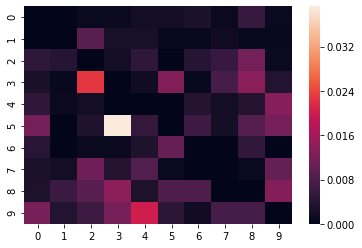

In [222]:
# heat맵 해석
sns.heatmap(norm_conf_mx)

In [237]:
# confusion matrix에서 눈에 띄는 데이터 찾아보기
validation = pd.DataFrame(y_vali)
validation['predict'] = prediction

# 숙제
- Milti-layer perceptron 구현해보기
- mlp의 confusion matrix, classification report 그려보고 해석하기
- 잘못분류된 데이터 시각화 해보기 
- 성능 약간 개선해보기 
- 최종적으로 가장 좋은 성능을 보이는 모델로 test predict를 해보고, 캐글에 제출하기 

In [239]:
miss_class = validation(validation['label']==4) & (validation['predict']==9).index
print(len(miss_class))

miss_class

KeyError: 'label'

In [231]:
# 잘못 분류되고 있는 데이터 확인하고 개선방법 고민
plt.imshow(x_vali.loc[miss_class[3]].values.reshape(28,28))

NameError: name 'miss_classi' is not defined

In [ ]:
print(class)

In [215]:
# mult_layer perceptron classifier

In [ ]:
mpl = MLPClassifier(early stopping=True, hidden_layer_sizes=(500,150,50),
                   max_iter=500, activation='relu', verbose=True, random_state=42)

In [ ]:
mpl.fit(x_train,y_train)